In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
import nibabel as nib
import csv
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from keras.models import Model
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

2023-09-16 23:20:44.826483: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 23:20:46.901907: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 23:20:46.909023: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 23:20:57.306630: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-16 23:21:08.087080: I itex/core/wrapper/itex_cpu_wrapper.cc:42] Intel Extension for Tensorflow* AVX512 CPU backend is loaded.
2023-09-16 23:21:08.169740: W itex/core/ops/op_init.cc:58] Op: _QuantizedMaxPool3D is already registered in Tensorflow
/home/u202949/tmp/ipykernel_240

In [2]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install path

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
Main_Path = Path(r"123/SDOBenchmark_example/training")

In [5]:
Main_Train_CSV = list(Main_Path.glob(r"123/SDOBenchmark_example/training/meta_data.csv"))

In [6]:
with open('123/SDOBenchmark_example/training/meta_data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    list_of_column_names = []
    for row in csv_reader:
        list_of_column_names.append(row)
        break
list_of_column_names[0]

['id', 'start', 'end', 'peak_flux']

In [7]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
data = pd.read_csv("123/SDOBenchmark_example/training/meta_data.csv")

In [9]:
data

id                          start  \
0    11389_2012_01_01_19_06_00_0  2012-01-01 07:06:00.000000000   
1    11390_2012_01_03_02_22_01_1  2012-01-03 14:22:00.000000000   
2    11392_2012_01_06_00_09_01_0  2012-01-05 12:09:01.000000000   
3    11388_2012_01_07_02_27_01_0  2012-01-06 14:27:01.000000000   
4    11394_2012_01_07_12_00_00_0  2012-01-07 00:00:00.000000000   
..                           ...                            ...   
412  12674_2017_09_05_02_22_00_5  2017-09-08 20:01:07.753754283   
413  12683_2017_09_28_01_01_00_3  2017-09-30 13:19:00.999999999   
414  12682_2017_10_05_02_49_59_0  2017-10-04 14:49:59.000000000   
415  12683_2017_10_06_16_35_59_0  2017-10-06 04:35:59.000000000   
416  12692_2017_12_22_06_29_01_0  2017-12-21 18:29:01.000000000   

                               end     peak_flux  
0    2012-01-01 19:06:00.000000000  1.882353e-06  
1    2012-01-04 02:22:00.000000000  7.529412e-07  
2    2012-01-06 00:09:01.000000000  3.058824e-06  
3    2012-01-07 02:27:01.000000000  5.764706e-06  
4    2012-01-07 12:00:00.000000000  1.000000e-09  
..                             ...           ...  
412  2017-09-09 08:01:07.753754283  1.000000e-09  
413  2017-10-01 01:19:00.999999999  1.000000e-09  
414  2017-10-05 02:49:59.000000000  1.647059e-07  
415  2017-10-06 16:35:59.000000000  5.411765e-07  
416  2017-12-22 06:29:01.000000000  3.882353e-07  

[417 rows x 4 columns]

In [10]:
print(len(data))

417


In [11]:
print(data.head(-1))

                              id                          start  \
0    11389_2012_01_01_19_06_00_0  2012-01-01 07:06:00.000000000   
1    11390_2012_01_03_02_22_01_1  2012-01-03 14:22:00.000000000   
2    11392_2012_01_06_00_09_01_0  2012-01-05 12:09:01.000000000   
3    11388_2012_01_07_02_27_01_0  2012-01-06 14:27:01.000000000   
4    11394_2012_01_07_12_00_00_0  2012-01-07 00:00:00.000000000   
..                           ...                            ...   
411  12676_2017_09_03_12_00_00_5  2017-09-05 12:00:00.000000000   
412  12674_2017_09_05_02_22_00_5  2017-09-08 20:01:07.753754283   
413  12683_2017_09_28_01_01_00_3  2017-09-30 13:19:00.999999999   
414  12682_2017_10_05_02_49_59_0  2017-10-04 14:49:59.000000000   
415  12683_2017_10_06_16_35_59_0  2017-10-06 04:35:59.000000000   

                               end     peak_flux  
0    2012-01-01 19:06:00.000000000  1.882353e-06  
1    2012-01-04 02:22:00.000000000  7.529412e-07  
2    2012-01-06 00:09:01.000000000  3.0588

In [12]:
print(data.isnull().sum())

id           0
start        0
end          0
peak_flux    0
dtype: int64


In [13]:
print(data["peak_flux"][0])

1.8823529411764705e-06


In [14]:
print(int(data["peak_flux"][0]))

0


In [15]:
print(int(data["peak_flux"][414]))

0


In [16]:
print(data["start"][414])

2017-10-04 14:49:59.000000000


In [17]:
print(data["start"][414][0:10])

2017-10-04


In [18]:
print(type(data["start"][414][0:10]))

<class 'str'>


In [19]:
Testing_Date_Transformation = data["start"][414][0:10].replace("-","")
print(Testing_Date_Transformation)

20171004


In [20]:
Testing_Date_Array = np.array(int(Testing_Date_Transformation))

In [21]:
print(type(Testing_Date_Array))

<class 'numpy.ndarray'>


In [22]:
data_new = pd.read_csv("123/SDOBenchmark_example/meta_data.csv")
data_new

id    start      end     peak_flux  \
0    11389_2012_01_01_19_06_00_0  06:00.0  06:00.0  1.880000e-06   
1    11390_2012_01_03_02_22_01_1  22:00.0  22:00.0  7.530000e-07   
2    11392_2012_01_06_00_09_01_0  09:01.0  09:01.0  3.060000e-06   
3    11388_2012_01_07_02_27_01_0  27:01.0  27:01.0  5.760000e-06   
4    11394_2012_01_07_12_00_00_0  00:00.0  00:00.0  1.000000e-09   
..                           ...      ...      ...           ...   
412  12674_2017_09_05_02_22_00_5  01:07.8  01:07.8  1.000000e-09   
413  12683_2017_09_28_01_01_00_3  19:01.0  19:01.0  1.000000e-09   
414  12682_2017_10_05_02_49_59_0  49:59.0  49:59.0  1.650000e-07   
415  12683_2017_10_06_16_35_59_0  35:59.0  35:59.0  5.410000e-07   
416  12692_2017_12_22_06_29_01_0  29:01.0  29:01.0  3.880000e-07   

                                                New_ID  
0    123/SDOBenchmark_example/training/11389/2012_0...  
1    123/SDOBenchmark_example/training/11389/2012_0...  
2    123/SDOBenchmark_example/training/11389/2012_0...  
3    123/SDOBenchmark_example/training/11389/2012_0...  
4    123/SDOBenchmark_example/training/11389/2012_0...  
..                                                 ...  
412  123/SDOBenchmark_example/training/11389/2012_0...  
413  123/SDOBenchmark_example/training/11389/2012_0...  
414  123/SDOBenchmark_example/training/11389/2012_0...  
415  123/SDOBenchmark_example/training/11389/2012_0...  
416  123/SDOBenchmark_example/training/11389/2012_0...  

[417 rows x 5 columns]

In [23]:
print(data_new.head(-1))

                              id    start      end     peak_flux  \
0    11389_2012_01_01_19_06_00_0  06:00.0  06:00.0  1.880000e-06   
1    11390_2012_01_03_02_22_01_1  22:00.0  22:00.0  7.530000e-07   
2    11392_2012_01_06_00_09_01_0  09:01.0  09:01.0  3.060000e-06   
3    11388_2012_01_07_02_27_01_0  27:01.0  27:01.0  5.760000e-06   
4    11394_2012_01_07_12_00_00_0  00:00.0  00:00.0  1.000000e-09   
..                           ...      ...      ...           ...   
411  12676_2017_09_03_12_00_00_5  00:00.0  00:00.0  1.000000e-09   
412  12674_2017_09_05_02_22_00_5  01:07.8  01:07.8  1.000000e-09   
413  12683_2017_09_28_01_01_00_3  19:01.0  19:01.0  1.000000e-09   
414  12682_2017_10_05_02_49_59_0  49:59.0  49:59.0  1.650000e-07   
415  12683_2017_10_06_16_35_59_0  35:59.0  35:59.0  5.410000e-07   

                                                New_ID  
0    123/SDOBenchmark_example/training/11389/2012_0...  
1    123/SDOBenchmark_example/training/11389/2012_0...  
2    123/SDO

In [24]:
print(data_new["New_ID"][0])
print("---"*10)
print(data_new["id"][0])

123/SDOBenchmark_example/training/11389/2012_01_01_19_06_00_0/2012-01-01T070600__131.jpg
------------------------------
11389_2012_01_01_19_06_00_0


In [25]:
New_Start = []
New_End = []
New_Path = []

for x_start,x_end,x_path in zip(data_new.start.values,data_new.end.values,data_new.New_ID.values):
    
    x_start = x_start[0:10]
    x_start = x_start.replace("-","")
    x_start = np.array(x_start,dtype="str")
    
    x_end = x_end[0:10]
    x_end = x_end.replace("-","")
    x_end = np.array(x_end,dtype="str")
    
    New_Start.append(x_start)
    New_End.append(x_end)
    New_Path.append(x_path)

In [26]:
print("LEN START: ",len(New_Start))
print("LEN END: ",len(New_End))
print("LEN PATH: ",len(New_Path))

LEN START:  417
LEN END:  417
LEN PATH:  417


In [27]:
print(New_Start[0])
print("--"*10)
print(New_End[0])
print("--"*10)
print(New_Path[0])

06:00.0
--------------------
06:00.0
--------------------
123/SDOBenchmark_example/training/11389/2012_01_01_19_06_00_0/2012-01-01T070600__131.jpg


In [28]:
print(type(New_Start[0]))
print("--"*10)
print(type(New_End[0]))
print("--"*10)
print(type(New_Path[0]))

<class 'numpy.ndarray'>
--------------------
<class 'numpy.ndarray'>
--------------------
<class 'str'>


In [29]:
Start_Series = pd.Series(New_Start,name="START")
End_Series = pd.Series(New_End,name="END")
Path_Series = pd.Series(New_Path,name="PATH").astype(str)

In [30]:
Main_Data = pd.concat([Path_Series,Start_Series,End_Series],axis=1)

In [31]:
print(Main_Data.head(-1))

                                                  PATH    START      END
0    123/SDOBenchmark_example/training/11389/2012_0...  06:00.0  06:00.0
1    123/SDOBenchmark_example/training/11389/2012_0...  22:00.0  22:00.0
2    123/SDOBenchmark_example/training/11389/2012_0...  09:01.0  09:01.0
3    123/SDOBenchmark_example/training/11389/2012_0...  27:01.0  27:01.0
4    123/SDOBenchmark_example/training/11389/2012_0...  00:00.0  00:00.0
..                                                 ...      ...      ...
411  123/SDOBenchmark_example/training/11389/2012_0...  00:00.0  00:00.0
412  123/SDOBenchmark_example/training/11389/2012_0...  01:07.8  01:07.8
413  123/SDOBenchmark_example/training/11389/2012_0...  19:01.0  19:01.0
414  123/SDOBenchmark_example/training/11389/2012_0...  49:59.0  49:59.0
415  123/SDOBenchmark_example/training/11389/2012_0...  35:59.0  35:59.0

[416 rows x 3 columns]


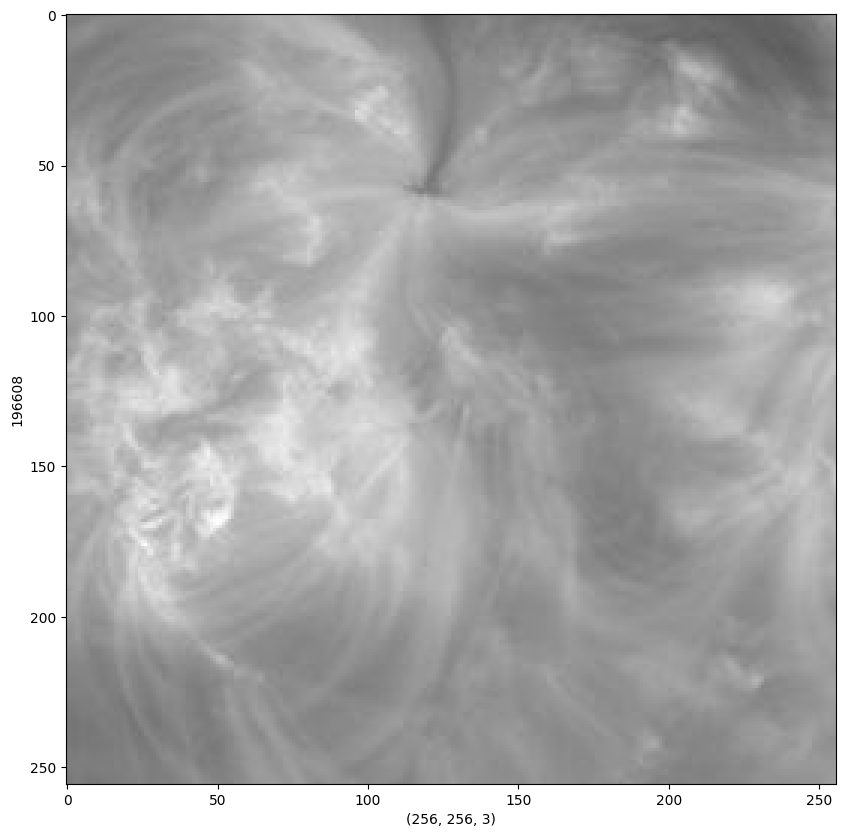

In [32]:
Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][33]),cv2.COLOR_BGR2RGB)

figure = plt.figure(figsize=(10,10))

plt.xlabel(Example_IMG.shape)
plt.ylabel(Example_IMG.size)
plt.imshow(Example_IMG)

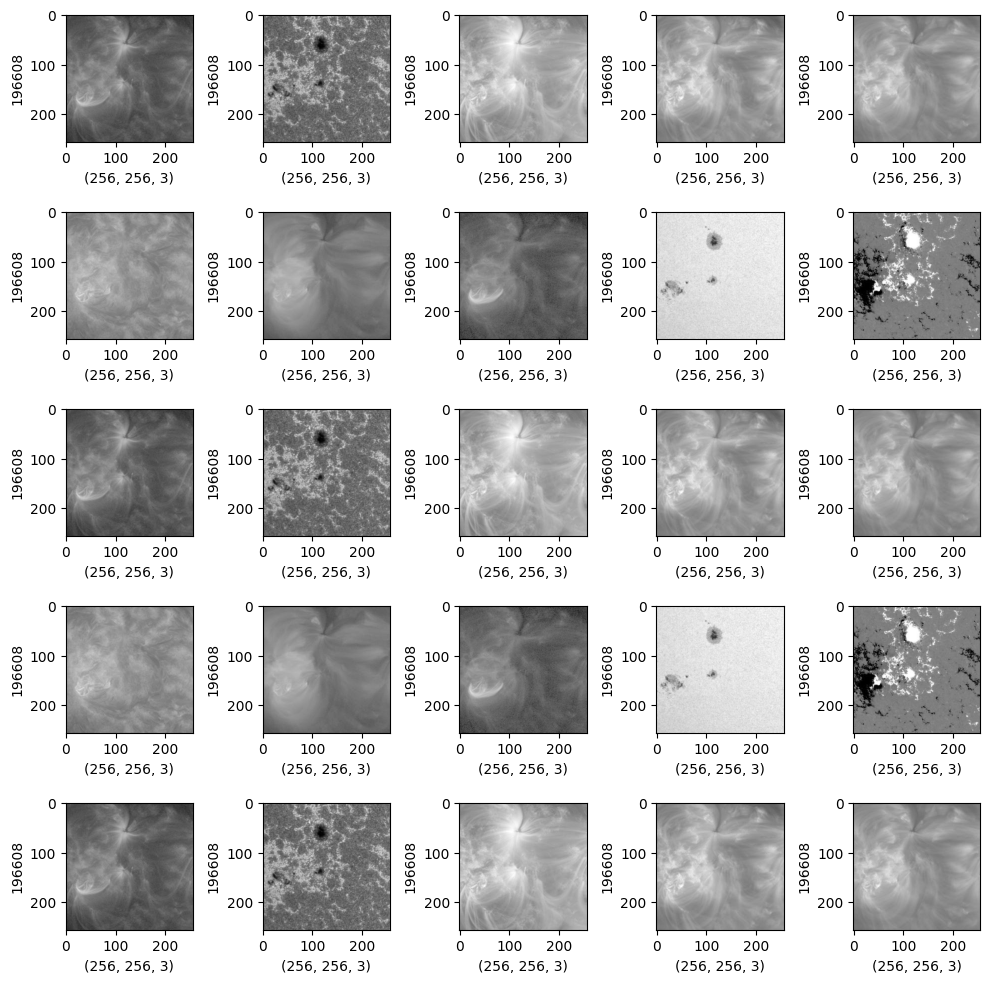

In [33]:
figure,axis = plt.subplots(5,5,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][indexing]),cv2.COLOR_BGR2RGB)
    
    operations.set_xlabel(Reading_IMG.shape)
    operations.set_ylabel(Reading_IMG.size)
    operations.imshow(Reading_IMG)

plt.tight_layout()
plt.show()

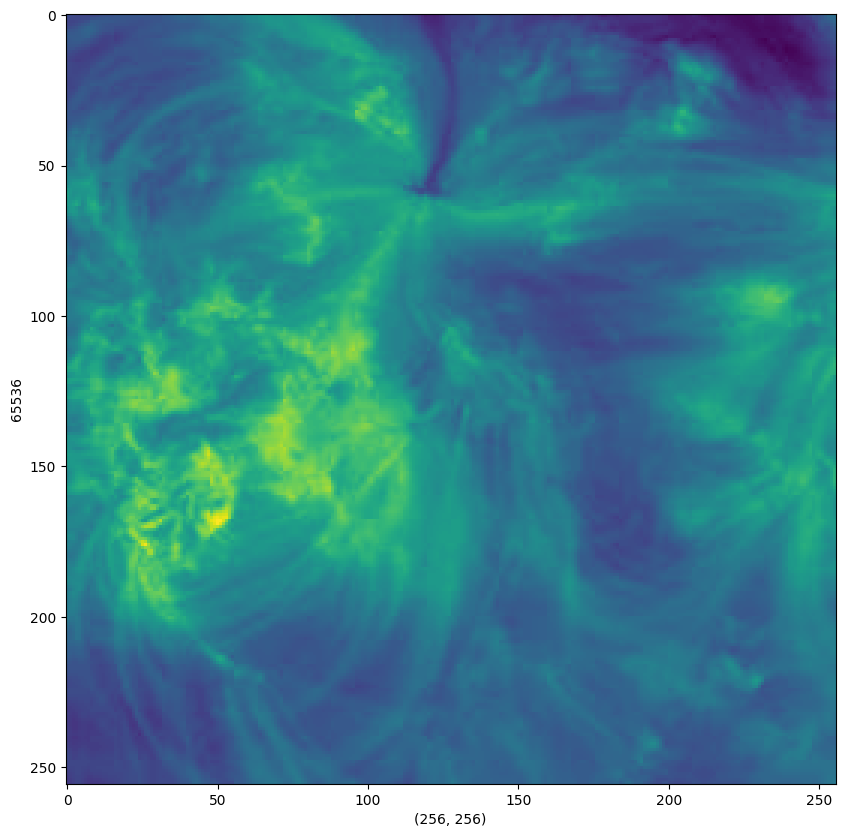

In [34]:
Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)

figure = plt.figure(figsize=(10,10))

plt.xlabel(Example_IMG[:,:,0].shape)
plt.ylabel(Example_IMG[:,:,0].size)
plt.imshow(Example_IMG[:,:,0])

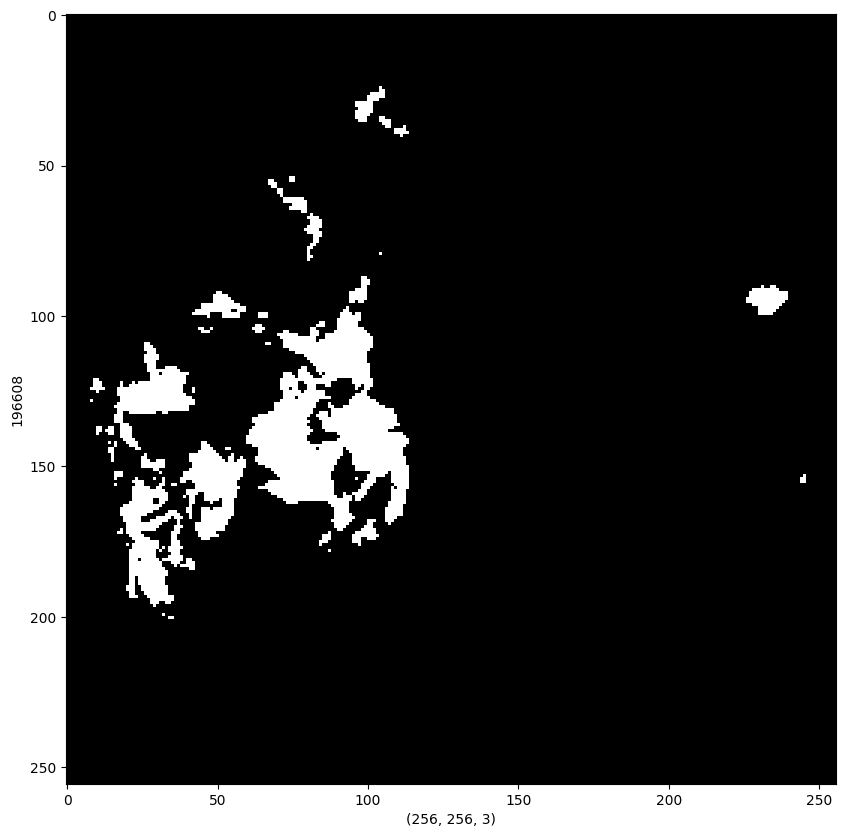

In [35]:
Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)

figure = plt.figure(figsize=(10,10))

plt.xlabel(Threshold_IMG.shape)
plt.ylabel(Threshold_IMG.size)
plt.imshow(Threshold_IMG)

(-0.5, 255.5, 255.5, -0.5)

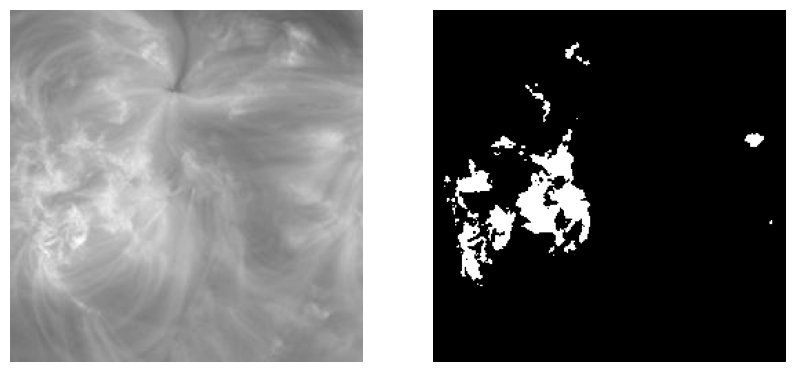

In [36]:
figure,axis = plt.subplots(1,2,figsize=(10,10))
Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")


(-0.5, 255.5, 255.5, -0.5)

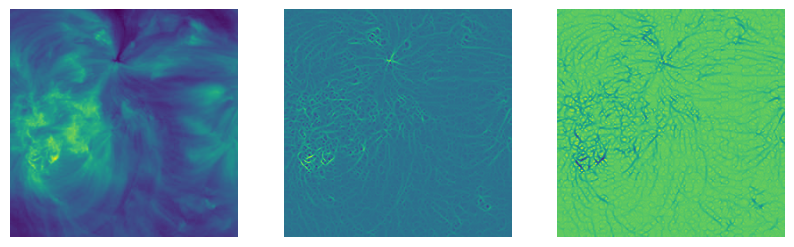

In [37]:
figure,axis = plt.subplots(1,3,figsize=(10,10))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][404]),cv2.COLOR_BGR2GRAY)
Hessian_IMG = hessian_matrix(Example_IMG,sigma=0.20,order="rc")
Max_IMG,Min_IMG = hessian_matrix_eigvals(Hessian_IMG)

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Max_IMG)
axis[1].axis("off")
axis[2].imshow(Min_IMG)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

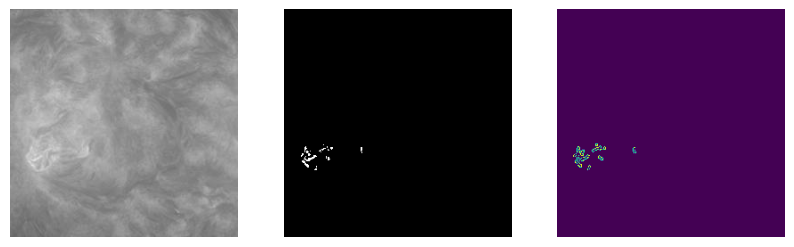

In [38]:
figure,axis = plt.subplots(1,3,figsize=(10,10))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][55]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)


axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")
axis[2].imshow(Canny_IMG)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

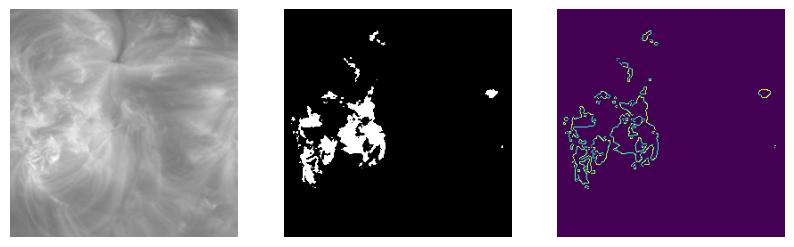

In [39]:
figure,axis = plt.subplots(1,3,figsize=(10,10))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][333]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)


axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")
axis[2].imshow(Canny_IMG)
axis[2].axis("off")

In [40]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][333]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)
Concat_IMG = cv2.addWeighted(Example_IMG[:,:,0],0.8,Canny_IMG,0.4,0.5)

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Canny_IMG)
axis[1].axis("off")
axis[2].imshow(Concat_IMG)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

(-0.5, 255.5, 255.5, -0.5)

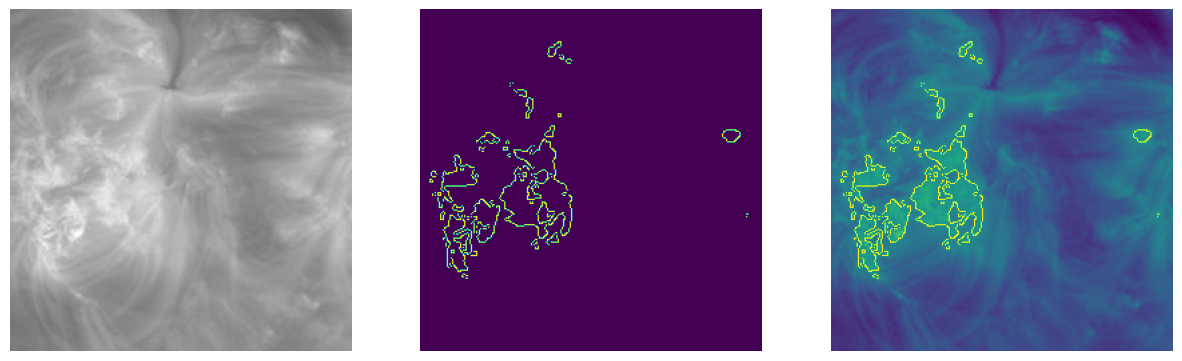

In [41]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)
Concat_IMG = cv2.addWeighted(Example_IMG[:,:,0],0.8,Canny_IMG,0.4,0.5)

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Canny_IMG)
axis[1].axis("off")
axis[2].imshow(Concat_IMG)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

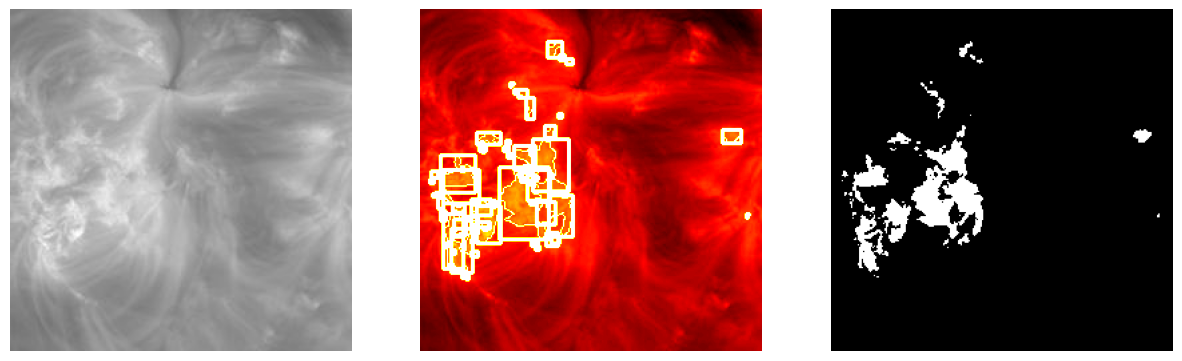

In [42]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)
Concat_IMG = cv2.addWeighted(Example_IMG[:,:,0],0.8,Canny_IMG,0.4,0.5)
contours,_ = cv2.findContours(Canny_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    Rect_IMG = cv2.rectangle(Concat_IMG,(x,y),(x+w,y+h),(255,0,0),2)
    
axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Concat_IMG,cmap="hot")
axis[1].axis("off")
axis[2].imshow(Threshold_IMG)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

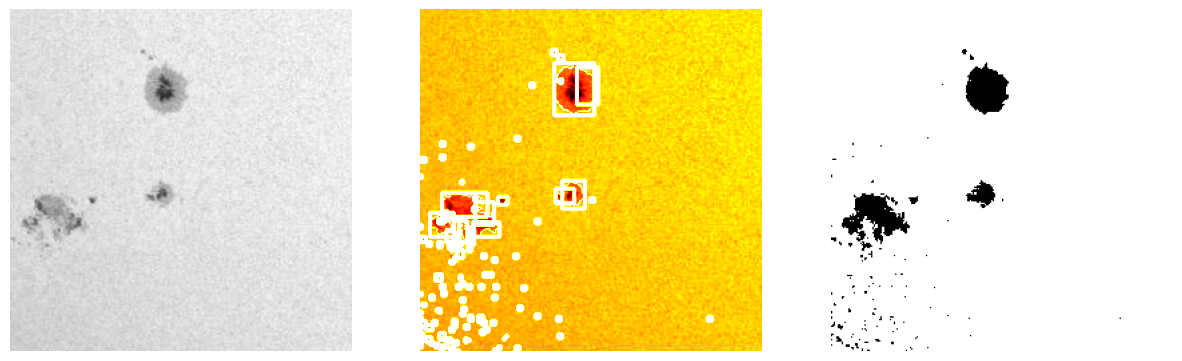

In [43]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][188]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)
Concat_IMG = cv2.addWeighted(Example_IMG[:,:,0],0.8,Canny_IMG,0.4,0.5)
contours,_ = cv2.findContours(Canny_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    Rect_IMG = cv2.rectangle(Concat_IMG,(x,y),(x+w,y+h),(255,0,0),2)
    
axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Concat_IMG,cmap="hot")
axis[1].axis("off")
axis[2].imshow(Threshold_IMG)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

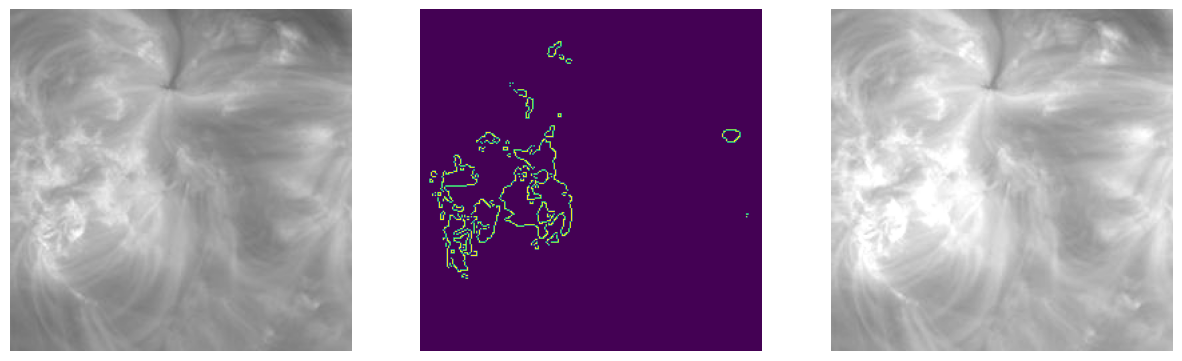

In [44]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

Copy_Main = Example_IMG.copy()
Copy_Main[Canny_IMG == 1] = [0,255,0]
Copy_Main[Canny_IMG == 2] = [0,0,255]
Copy_Main_Two = Example_IMG.copy()

Concat_IMG = cv2.addWeighted(Copy_Main,0.5,Copy_Main_Two,0.7,0,Copy_Main_Two)

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Canny_IMG)
axis[1].axis("off")
axis[2].imshow(Concat_IMG)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

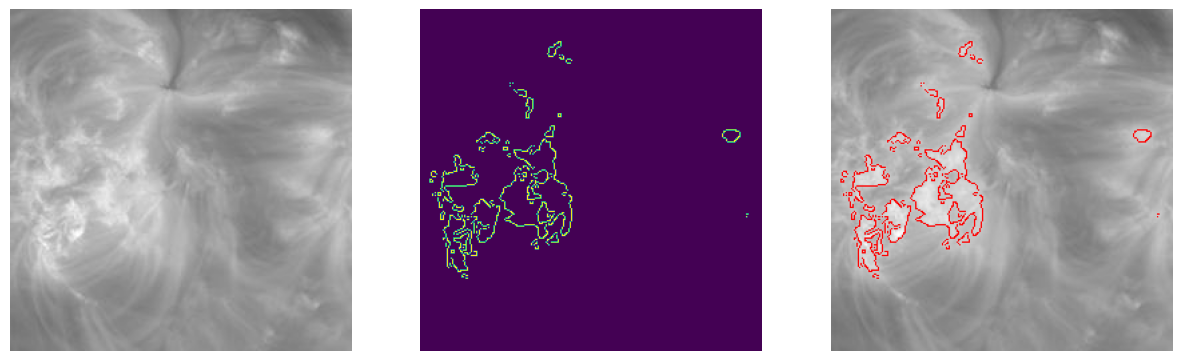

In [45]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

Copy_Main = Example_IMG.copy()
Copy_Main[Canny_IMG == 255] = [255,0,0]

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Canny_IMG)
axis[1].axis("off")
axis[2].imshow(Copy_Main)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

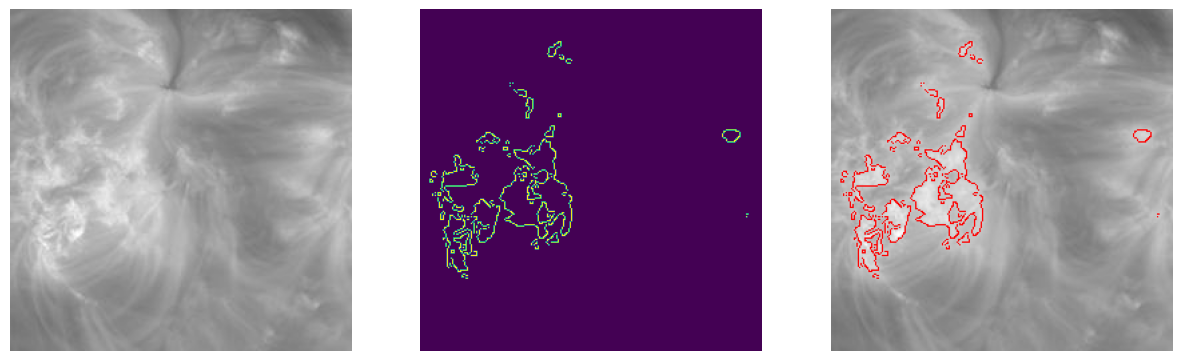

In [46]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][123]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

Copy_Main = Example_IMG.copy()
Copy_Main[Canny_IMG == 255] = [255,0,0]

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Canny_IMG)
axis[1].axis("off")
axis[2].imshow(Copy_Main)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

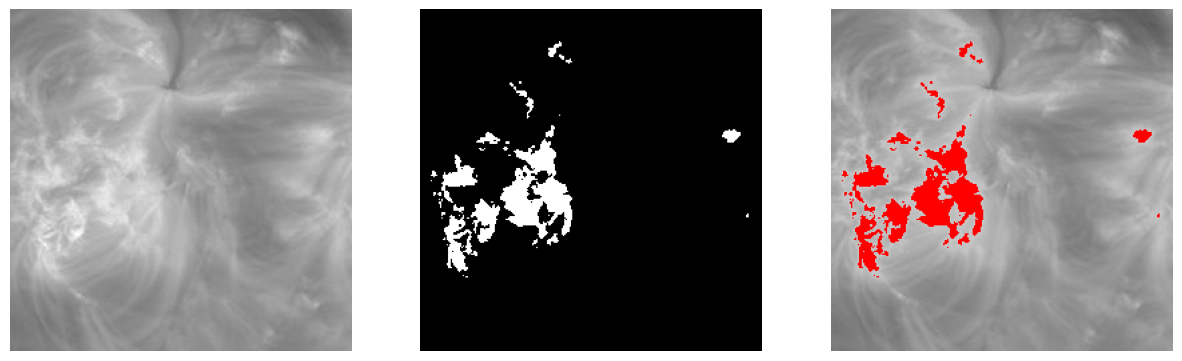

In [47]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][223]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

Copy_Main = Example_IMG.copy()
Copy_Main[Threshold_IMG[:,:,0] == 255] = [255,0,0]

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")
axis[2].imshow(Copy_Main)
axis[2].axis("off")

In [48]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][1]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

Copy_Main = Example_IMG.copy()
Copy_Main[Threshold_IMG[:,:,0] == 255] = [255,0,0]

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")
axis[2].imshow(Copy_Main)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

(-0.5, 255.5, 255.5, -0.5)

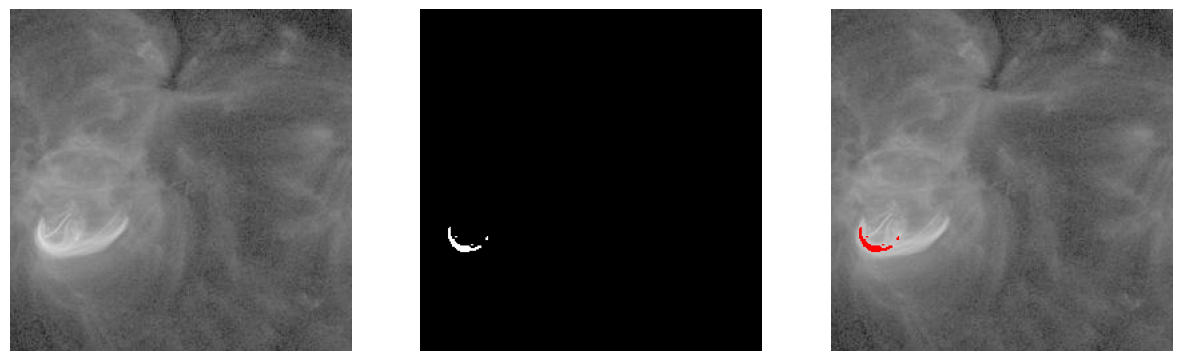

In [49]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][17]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

Copy_Main = Example_IMG.copy()
Copy_Main[Threshold_IMG[:,:,0] == 255] = [255,0,0]

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")
axis[2].imshow(Copy_Main)
axis[2].axis("off")

In [50]:
X_Start = []
X_End = []
X_Image = []

for img,start_i,end_i in zip(Main_Data.PATH.values,Main_Data.START.values,Main_Data.END.values):
    Picking_IMG = cv2.cvtColor(cv2.imread(img),cv2.COLOR_BGR2RGB)
    Picking_IMG = cv2.resize(Picking_IMG,(180,180))
    Picking_IMG = Picking_IMG / 255.
    
    X_Image.append(Picking_IMG)
    X_Start.append(start_i)
    X_End.append(end_i)

In [51]:
print(np.shape(np.array(X_Image)))
print(np.shape(np.array(X_Start)))
print(np.shape(np.array(X_End)))

(417, 180, 180, 3)
(417,)
(417,)


In [52]:
Train_JPG = np.array(X_Image)
Train_START = np.array(X_Start)
Train_END = np.array(X_End)

In [53]:
print(Train_JPG.shape)
print(Train_START.shape)
print(Train_END.shape)

(417, 180, 180, 3)
(417,)
(417,)


In [54]:
Scalar_Function = MinMaxScaler()

Train_START_R = Train_START.reshape(-1,1)
Train_END_R = Train_END.reshape(-1,1)

In [55]:
X_Mask = []
X_New_IMG = []

for img_i in Main_Data.PATH.values:
    Picking_IMG = cv2.cvtColor(cv2.imread(img_i),cv2.COLOR_BGR2RGB)
    _,Threshold_IMG = cv2.threshold(Picking_IMG,200,255,cv2.THRESH_BINARY)
    Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

    Copy_Main = Picking_IMG.copy()
    Copy_Main[Canny_IMG == 255] = [255,0,0]
    
    Copy_Main = cv2.resize(Copy_Main,(180,180))
    Copy_Main = Copy_Main / 255.
    
    Picking_IMG = cv2.resize(Picking_IMG,(180,180))
    Picking_IMG = Picking_IMG / 255.
    
    X_Mask.append(Copy_Main)
    X_New_IMG.append(Picking_IMG)

In [56]:
X_Mask = np.array(X_Mask)
X_New_IMG = np.array(X_New_IMG)

In [57]:
print(X_New_IMG.shape)
print(X_Mask.shape)

(417, 180, 180, 3)
(417, 180, 180, 3)


(-0.5, 179.5, 179.5, -0.5)

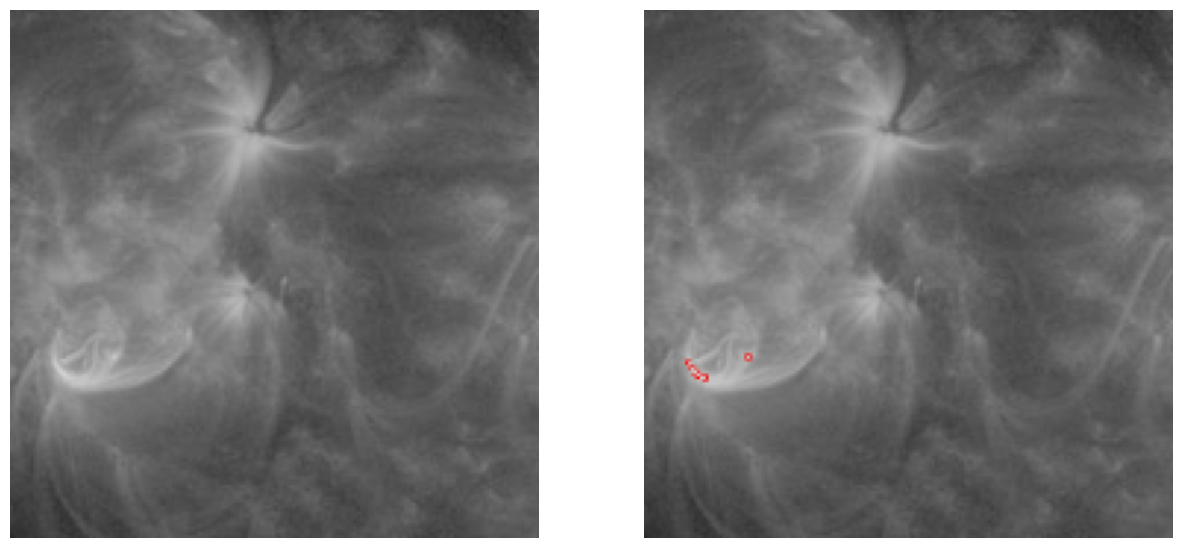

In [58]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

axis[0].imshow(X_New_IMG[0])
axis[0].axis("off")
axis[1].imshow(X_Mask[0])
axis[1].axis("off")

(-0.5, 179.5, 179.5, -0.5)

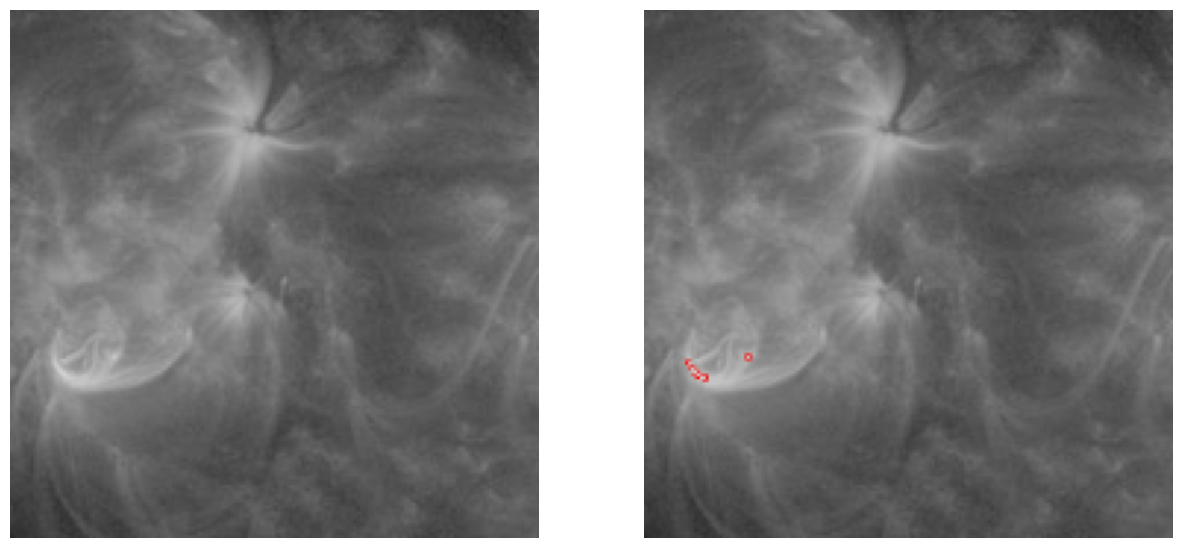

In [59]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

axis[0].imshow(X_New_IMG[100])
axis[0].axis("off")
axis[1].imshow(X_Mask[100])
axis[1].axis("off")

(-0.5, 179.5, 179.5, -0.5)

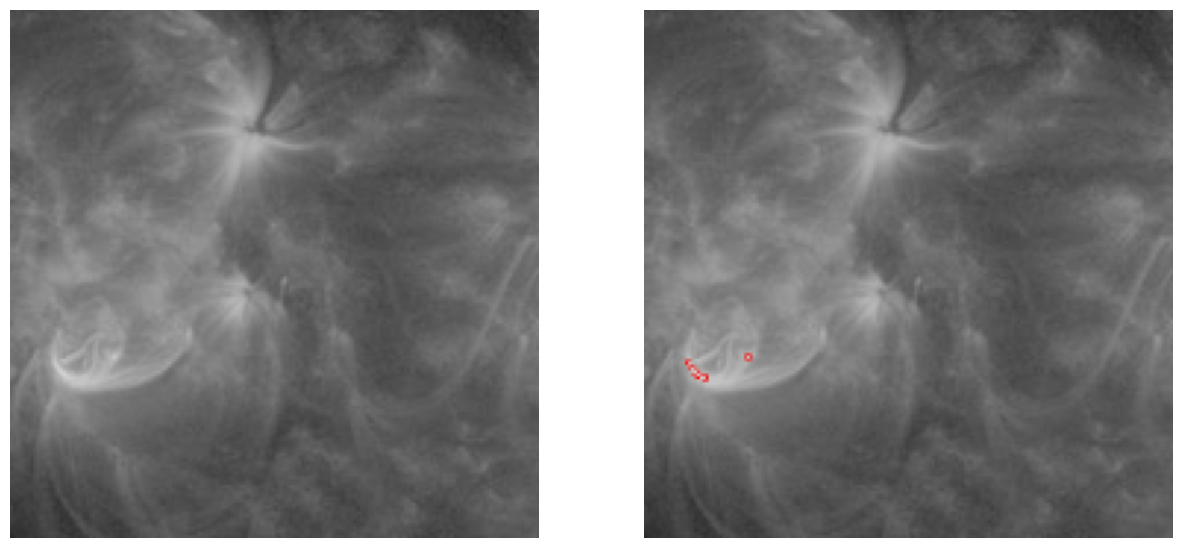

In [60]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

axis[0].imshow(X_New_IMG[200])
axis[0].axis("off")
axis[1].imshow(X_Mask[200])
axis[1].axis("off")

(-0.5, 179.5, 179.5, -0.5)

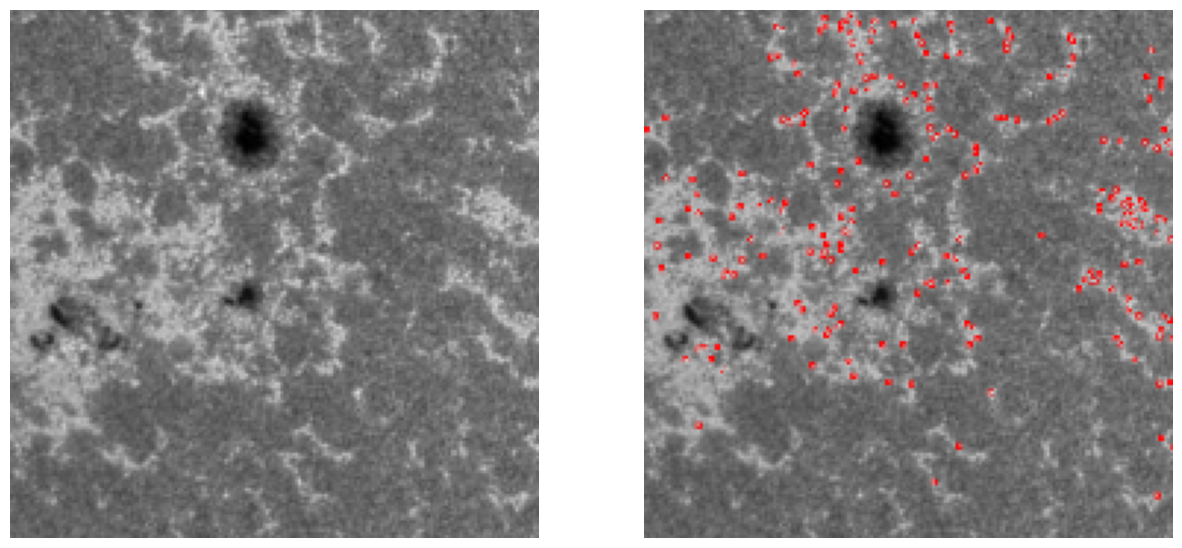

In [61]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

axis[0].imshow(X_New_IMG[231])
axis[0].axis("off")
axis[1].imshow(X_Mask[231])
axis[1].axis("off")

In [62]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")
Reduce_Model = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                   factor=0.1,
                                                   patience=5)
compile_loss = "binary_crossentropy"
compile_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

output_class = 1

In [63]:
E_AE = Sequential()
#
E_AE.add(Conv2D(32,(5,5),kernel_initializer = 'he_normal',use_bias = True, padding="valid"))
E_AE.add(BatchNormalization())
E_AE.add(ReLU())
#
E_AE.add(Conv2D(64,(5,5),kernel_initializer = 'he_normal',use_bias = True, padding="valid"))
E_AE.add(BatchNormalization())
E_AE.add(ReLU())
#
E_AE.add(Conv2D(128,(5,5),kernel_initializer = 'he_normal',use_bias = True, padding="valid"))
E_AE.add(BatchNormalization())
E_AE.add(ReLU())
#
E_AE.add(Conv2D(256,(5,5),kernel_initializer = 'he_normal',use_bias = True, padding="valid"))
E_AE.add(BatchNormalization())
E_AE.add(ReLU())




D_AE = Sequential()
#
D_AE.add(Conv2DTranspose(128,(5,5), padding="valid"))
D_AE.add(ReLU())
#
D_AE.add(Conv2DTranspose(64,(5,5), padding="valid"))
D_AE.add(ReLU())
#
D_AE.add(Conv2DTranspose(32,(5,5), padding="valid"))
D_AE.add(ReLU())
#
D_AE.add(Conv2DTranspose(output_class,(5,5), padding="valid"))
D_AE.add(ReLU())

In [64]:
Auto_Encoder = Sequential([E_AE,D_AE])
Auto_Encoder.compile(loss=compile_loss,optimizer=compile_optimizer,metrics=["mse"])

In [ ]:
Model_AutoEncoder = Auto_Encoder.fit(X_New_IMG,X_Mask,epochs=55,callbacks=[Checkpoint_Model])

Epoch 1/55


2023-09-16 23:21:45.756079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-09-16 23:21:45.774584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-09-16 23:21:45.783517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-09-16 23:21:47.344352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


14/14 [==============================] - 204s 14s/step - loss: 6.4686 - mse: 16283.5723
Epoch 2/55
14/14 [==============================] - 200s 14s/step - loss: 6.3840 - mse: 65404.3828
Epoch 3/55
14/14 [==============================] - 200s 14s/step - loss: 4.8505 - mse: 21012.8086
Epoch 4/55
14/14 [==============================] - 200s 14s/step - loss: 1.9415 - mse: 699.8239
Epoch 5/55
14/14 [==============================] - 200s 14s/step - loss: 1.2447 - mse: 191.8770
Epoch 6/55
14/14 [==============================] - 200s 14s/step - loss: 1.0096 - mse: 23.2042
Epoch 7/55
14/14 [==============================] - 200s 14s/step - loss: 0.8864 - mse: 0.4134
Epoch 8/55
14/14 [==============================] - 200s 14s/step - loss: 0.8451 - mse: 0.1377
Epoch 9/55
14/14 [==============================] - 200s 14s/step - loss: 0.7832 - mse: 0.0940
Epoch 10/55
14/14 [==============================] - 200s 14s/step - loss: 0.7777 - mse: 0.2052
Epoch 11/55
14/14 [========================

In [ ]:
plt.style.use("dark_background")

In [ ]:
Prediction_MASK_Seen = Auto_Encoder.predict(X_New_IMG[:20])

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
pre_img_number = 1

Original_Img = X_New_IMG[pre_img_number]
Predict_Mask = Prediction_MASK_Seen[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Mask)
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
pre_img_number = 2

Original_Img = X_New_IMG[pre_img_number]
Predict_Mask = Prediction_MASK_Seen[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Mask)
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
pre_img_number = 3

Original_Img = X_New_IMG[pre_img_number]
Predict_Mask = Prediction_MASK_Seen[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Mask)
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
pre_img_number = 4

Original_Img = X_New_IMG[pre_img_number]
Predict_Mask = Prediction_MASK_Seen[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Mask)
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
pre_img_number = 5

Original_Img = X_New_IMG[pre_img_number]
Predict_Mask = Prediction_MASK_Seen[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Mask)
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
pre_img_number = 6

Original_Img = X_New_IMG[pre_img_number]
Predict_Mask = Prediction_MASK_Seen[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Mask)
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
pre_img_number = 7

Original_Img = X_New_IMG[pre_img_number]
Predict_Mask = Prediction_MASK_Seen[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Mask,cmap="hot")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
pre_img_number = 8

Original_Img = X_New_IMG[pre_img_number]
Predict_Mask = Prediction_MASK_Seen[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Mask,cmap="hot")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
pre_img_number = 9

Original_Img = X_New_IMG[pre_img_number]
Predict_Mask = Prediction_MASK_Seen[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Mask,cmap="hot")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
pre_img_number = 10

Original_Img = X_New_IMG[pre_img_number]
Predict_Mask = Prediction_MASK_Seen[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
pre_img_number = 11

Original_Img = X_New_IMG[pre_img_number]
Predict_Mask = Prediction_MASK_Seen[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
pre_img_number = 12

Original_Img = X_New_IMG[pre_img_number]
Predict_Mask = Prediction_MASK_Seen[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
Reading_IMG = cv2.cvtColor(cv2.imread("123/SDOBenchmark_example/test/11476/2012_05_14_16_18_57_0/2012-05-14T041857__335.jpg"),cv2.COLOR_BGR2RGB)
Reading_IMG = cv2.resize(Reading_IMG,(180,180))

In [ ]:
Reading_IMG_Shape = Reading_IMG.reshape(1,Reading_IMG.shape[0],Reading_IMG.shape[1],Reading_IMG.shape[2])

In [ ]:
figure = plt.figure(figsize=(10,10))

plt.imshow(Reading_IMG)

In [ ]:
MASK_Seen = Auto_Encoder.predict(Reading_IMG_Shape)

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(14,14))

axis[0].imshow(Reading_IMG)
axis[0].set_xlabel(Reading_IMG.shape)
axis[0].set_ylabel(Reading_IMG.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(MASK_Seen[0])
axis[1].set_xlabel(MASK_Seen[0].shape)
axis[1].set_ylabel(MASK_Seen[0].size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
Reading_IMG = cv2.cvtColor(cv2.imread("123/SDOBenchmark_example/test/11476/2012_05_14_16_18_57_0/2012-05-14T144857__magnetogram.jpg"),cv2.COLOR_BGR2RGB)
Reading_IMG = cv2.resize(Reading_IMG,(180,180))
Reading_IMG_Shape = Reading_IMG.reshape(1,Reading_IMG.shape[0],Reading_IMG.shape[1],Reading_IMG.shape[2])
MASK_Seen = Auto_Encoder.predict(Reading_IMG_Shape)



figure,axis = plt.subplots(1,2,figsize=(14,14))

axis[0].imshow(Reading_IMG)
axis[0].set_xlabel(Reading_IMG.shape)
axis[0].set_ylabel(Reading_IMG.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(MASK_Seen[0])
axis[1].set_xlabel(MASK_Seen[0].shape)
axis[1].set_ylabel(MASK_Seen[0].size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
Reading_IMG = cv2.cvtColor(cv2.imread("123/SDOBenchmark_example/test/11476/2012_05_14_16_18_57_0/2012-05-14T160857__193.jpg"),cv2.COLOR_BGR2RGB)
Reading_IMG = cv2.resize(Reading_IMG,(180,180))
Reading_IMG_Shape = Reading_IMG.reshape(1,Reading_IMG.shape[0],Reading_IMG.shape[1],Reading_IMG.shape[2])
MASK_Seen = Auto_Encoder.predict(Reading_IMG_Shape)



figure,axis = plt.subplots(1,2,figsize=(14,14))

axis[0].imshow(Reading_IMG)
axis[0].set_xlabel(Reading_IMG.shape)
axis[0].set_ylabel(Reading_IMG.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(MASK_Seen[0],cmap="hot")
axis[1].set_xlabel(MASK_Seen[0].shape)
axis[1].set_ylabel(MASK_Seen[0].size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
Reading_IMG = cv2.cvtColor(cv2.imread("123/SDOBenchmark_example/test/11476/2012_05_14_16_18_57_0/2012-05-14T111857__94.jpg"),cv2.COLOR_BGR2RGB)
Reading_IMG = cv2.resize(Reading_IMG,(180,180))
Reading_IMG_Shape = Reading_IMG.reshape(1,Reading_IMG.shape[0],Reading_IMG.shape[1],Reading_IMG.shape[2])
MASK_Seen = Auto_Encoder.predict(Reading_IMG_Shape)



figure,axis = plt.subplots(1,2,figsize=(14,14))

axis[0].imshow(Reading_IMG)
axis[0].set_xlabel(Reading_IMG.shape)
axis[0].set_ylabel(Reading_IMG.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(MASK_Seen[0],cmap="hot")
axis[1].set_xlabel(MASK_Seen[0].shape)
axis[1].set_ylabel(MASK_Seen[0].size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
Reading_IMG = cv2.cvtColor(cv2.imread("123/SDOBenchmark_example/test/12033/2014_04_10_12_00_00_0/2014-04-10T000000__continuum.jpg"),cv2.COLOR_BGR2RGB)
Reading_IMG = cv2.resize(Reading_IMG,(180,180))
Reading_IMG_Shape = Reading_IMG.reshape(1,Reading_IMG.shape[0],Reading_IMG.shape[1],Reading_IMG.shape[2])
MASK_Seen = Auto_Encoder.predict(Reading_IMG_Shape)



figure,axis = plt.subplots(1,2,figsize=(14,14))

axis[0].imshow(Reading_IMG)
axis[0].set_xlabel(Reading_IMG.shape)
axis[0].set_ylabel(Reading_IMG.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(MASK_Seen[0],cmap="gist_yarg")
axis[1].set_xlabel(MASK_Seen[0].shape)
axis[1].set_ylabel(MASK_Seen[0].size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
Reading_IMG = cv2.cvtColor(cv2.imread("123/SDOBenchmark_example/test/12033/2014_04_10_12_00_00_0/2014-04-10T103000__magnetogram.jpg"),cv2.COLOR_BGR2RGB)
Reading_IMG = cv2.resize(Reading_IMG,(180,180))
Reading_IMG_Shape = Reading_IMG.reshape(1,Reading_IMG.shape[0],Reading_IMG.shape[1],Reading_IMG.shape[2])
MASK_Seen = Auto_Encoder.predict(Reading_IMG_Shape)



figure,axis = plt.subplots(1,2,figsize=(14,14))

axis[0].imshow(Reading_IMG)
axis[0].set_xlabel(Reading_IMG.shape)
axis[0].set_ylabel(Reading_IMG.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(MASK_Seen[0],cmap="cubehelix")
axis[1].set_xlabel(MASK_Seen[0].shape)
axis[1].set_ylabel(MASK_Seen[0].size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
Reading_IMG = cv2.cvtColor(cv2.imread("123/SDOBenchmark_example/test/12473/2015_12_31_06_38_01_0/2015-12-30T183801__335.jpg"),cv2.COLOR_BGR2RGB)
Reading_IMG = cv2.resize(Reading_IMG,(180,180))
Reading_IMG_Shape = Reading_IMG.reshape(1,Reading_IMG.shape[0],Reading_IMG.shape[1],Reading_IMG.shape[2])
MASK_Seen = Auto_Encoder.predict(Reading_IMG_Shape)



figure,axis = plt.subplots(1,2,figsize=(14,14))

axis[0].imshow(Reading_IMG)
axis[0].set_xlabel(Reading_IMG.shape)
axis[0].set_ylabel(Reading_IMG.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(MASK_Seen[0],cmap="cubehelix")
axis[1].set_xlabel(MASK_Seen[0].shape)
axis[1].set_ylabel(MASK_Seen[0].size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[180,180,3]))
encoder.add(Dense(300,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation="relu"))
decoder.add(Dense(100,activation="relu"))
decoder.add(Dense(200,activation="relu"))
decoder.add(Dense(300,activation="relu"))
decoder.add(Dense(180*180*3,activation="sigmoid"))
decoder.add(Reshape([180,180,3]))

In [ ]:
AutoEncoder_II = Sequential([encoder,decoder])

In [ ]:
AutoEncoder_II.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["mse"])

In [ ]:
AutoEncoder_II.fit(X_New_IMG,X_New_IMG,epochs=40)

In [ ]:
PRE_Img = AutoEncoder_II.predict(X_New_IMG[:10])

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
pre_img_number = 1

Original_Img = X_New_IMG[pre_img_number]
Predict_Reduce = PRE_Img[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Reduce)
axis[1].set_xlabel(Predict_Reduce.shape)
axis[1].set_ylabel(Predict_Reduce.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
pre_img_number = 2

Original_Img = X_New_IMG[pre_img_number]
Predict_Reduce = PRE_Img[pre_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[0].axis("off")
axis[1].imshow(Predict_Reduce)
axis[1].set_xlabel(Predict_Reduce.shape)
axis[1].set_ylabel(Predict_Reduce.size)
axis[1].set_title("PREDICTION")
axis[1].axis("off")